# Bike_Sharing

アメリカのレンタル自転車サービス「Capital Bikeshare」に関する分析  
https://www.capitalbikeshare.com/how-it-works  
各レンタルスポットで１日にレンタルされる自転車の台数についての要因分析と予測モデルを作成することが目的  

データは下記に公開されているものを使用。  
UCI:http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

# 目次

１．データの読み込みと変数の確認  
２．季節の変数について分析  
３．気温の変数について分析  
４．天候について分析  
５．2011年と2012年の比較  
６．月ごとの分析  
７．曜日/休日について分析  
８．重回帰分析による要因分析と予測モデル作成  
９．予測精度の確認  
１０.ランダムフォレストによる要因分析と予測モデル作成  
１１.Lasso回帰による要因分析と予測モデル作成  
１２.傾向分析の結果と仮説  
１３.要因分析の結果  
１４.予測モデル作成  

# １．データの読み込みと変数の確認  

In [1]:
#必要なライブラリをまとめてインポート
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import os

import math
import scipy.stats as stats
import statsmodels.api as sm
import pylab
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# データセットの読み込み
day_df = pd.read_csv('day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
# レコード数とカラム数の確認
day_df.shape

(731, 16)

In [4]:
# 説明変数の確認
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

説明変数の詳細
- instant: record index
- dteday : date
- season(季節) : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr(年) : year (0: 2011, 1:2012)
- mnth(月) : month ( 1 to 12)
- hr(時間) : hour (0 to 23)
- holiday(休日) : weather day is holiday or not (extracted from [https://dchr.dc.gov/page/holiday-schedules])
- weekday(曜日) : day of the week
- workingday(平日) : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit(天候) : 
- 1:快晴 Clear, Few clouds, Partly cloudy, Partly cloudy
- 2:曇り・霧 Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3:小雨・小雪 Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4:大雨・大雪 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp(気温) : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp(体感気温): Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum(湿度): Normalized humidity. The values are divided to 100 (max)
- windspeed(風速): Normalized wind speed. The values are divided to 67 (max)
- casual(ライトユーザー数): count of casual users
- registered(登録ユーザー数): count of registered users
- cnt(レンタル数): count of total rental bikes including both casual and registered

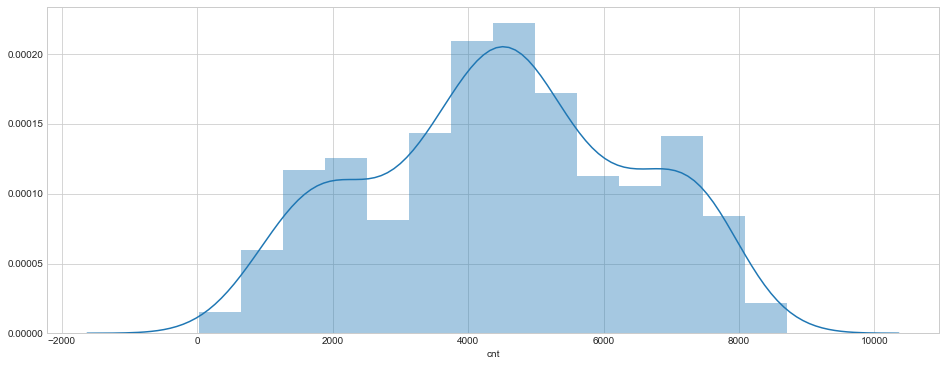

In [5]:
# ヒストグラムの作成
plt.figure(figsize=(16, 6))
sns.distplot(day_df['cnt'])

In [6]:
# 欠損値の確認
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# ２．季節の変数について分析

季節によって、自転車を利用する人にバラつきがあると考えられるため、まずは季節の観点から傾向を分析する。

In [7]:
# 季節ごとの平均値を確認
day_df.groupby('season').mean()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,
1,262.685083,0.502762,3.093923,0.038674,3.000000,0.662983,1.408840,0.297748,0.296914,0.582903,0.214537,334.928177,2269.204420,2604.132597
2,308.500000,0.500000,4.652174,0.021739,2.989130,0.695652,1.402174,0.544405,0.520307,0.626948,0.203507,1106.097826,3886.233696,4992.331522
3,401.500000,0.500000,7.691489,0.021277,3.031915,0.696809,1.297872,0.706309,0.655898,0.633482,0.172095,1202.611702,4441.691489,5644.303191
4,493.000000,0.500000,10.696629,0.033708,2.966292,0.679775,1.477528,0.422906,0.415539,0.668719,0.171995,729.112360,3999.050562,4728.162921


内訳　1:springer(春),2:summer(夏),3:fall(秋),4:winter(冬)

1:springer(春)はcnt(レンタル数)が少ない。  
3:fall(秋)が最も多く、春と平均約3000台の差。  
また、春と冬は比較的casual(ライトユーザー)が少ない傾向にある。  

当たり前だが、temp(気温)とatemp(体感気温)でも差が見られる。  
その他の変数に目立った差が見られないことから、この2変数は重要な要因と考えられる。  

下記は季節ごとのレンタル数平均のグラフ。

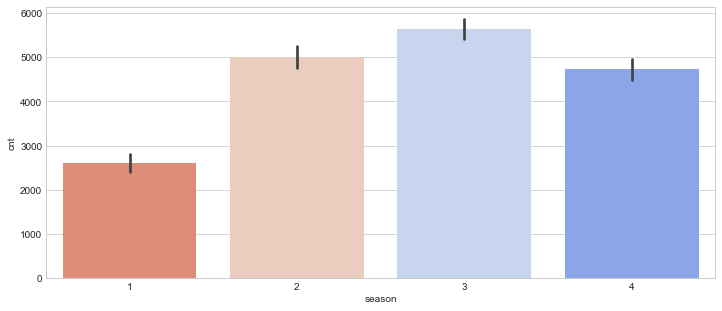

In [8]:
# 季節ごとのレンタル数平均のグラフ
plt.figure(figsize=(12, 5))
sns.barplot('season', 'cnt' ,data = day_df, palette = 'coolwarm_r')

ライトユーザーの傾向も確認。

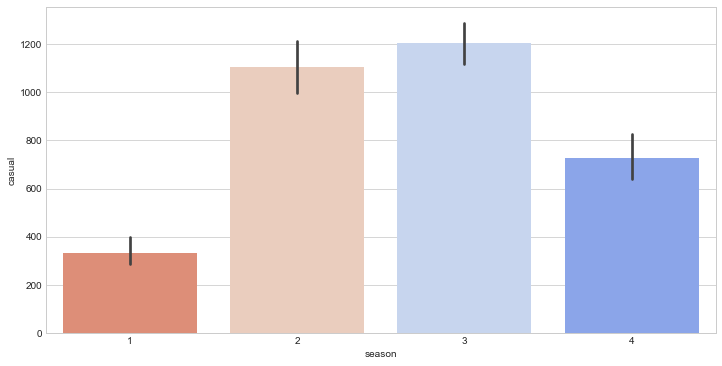

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot('season', 'casual' ,data = day_df,palette = 'coolwarm_r')

冬はレンタル数に対して、ライトユーザーの割合が低い。  

# ３．気温の変数について分析

季節ごとの分析から、気温の影響が大きい可能性があることがわかったため、  
temp/atempに合わせて、一般的に気温と関連するwindspeed(風速)とhum(湿度)も加えて相関を見ていく。  

In [10]:
# 気温関連の変数を格納
corr_f = day_df[['atemp','temp','hum','windspeed','cnt']]

In [11]:
# 相関係数の算出
corr = corr_f.select_dtypes(include = ['float64', 'int64']).corr()
corr['cnt'].sort_values(ascending = False)

cnt          1.000000
atemp        0.631066
temp         0.627494
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64

atemp(体感気温)、temp(気温)ともにレンタル台数と高い相関。    
また、hum(湿度)とwindspeed(風速)には負の弱い相関。  

下記はそれぞれの散布図。

<Figure size 1296x432 with 0 Axes>

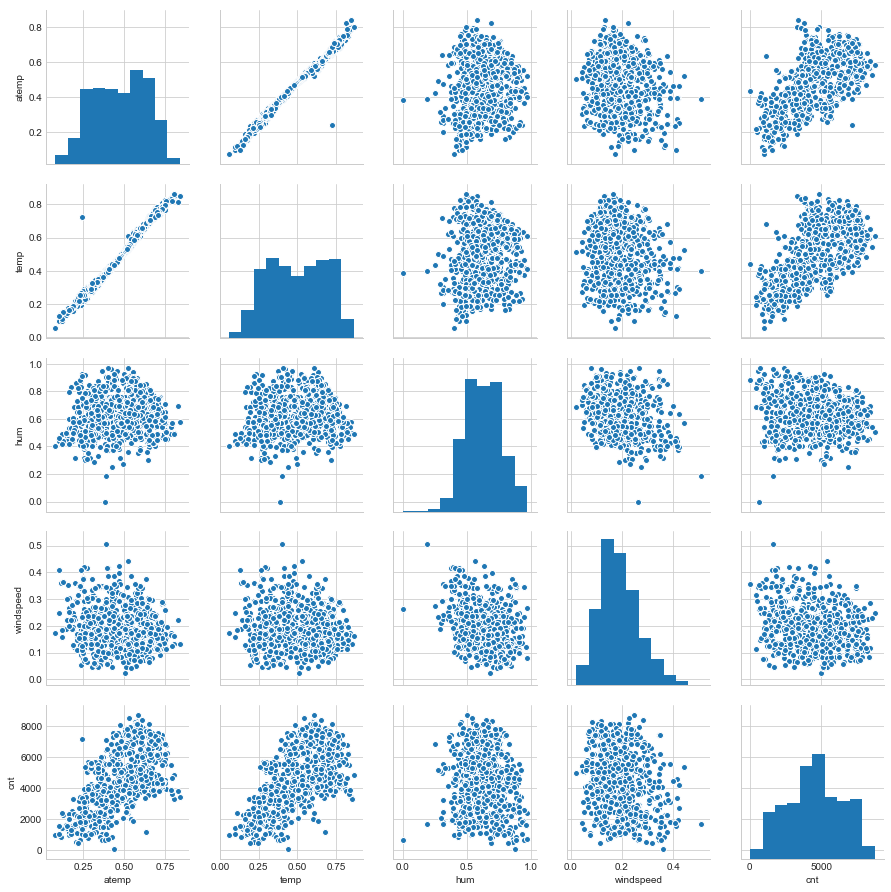

In [12]:
# 気温関連の相関図
plt.figure(figsize=(18, 6))
sns.pairplot(corr_f)

外れ値が見られるため、これらを除外していく。

In [13]:
#気温と体感気温の差を確認
temp_atemp_diff = abs(day_df['temp'] - day_df['atemp'])
temp_atemp_diff

0      0.019458
1      0.009739
2      0.006959
3      0.012122
4      0.002313
5      0.028861
6      0.012317
7      0.002746
8      0.022158
9      0.000055
10     0.022373
11     0.012254
12     0.014117
13     0.027543
14     0.014779
15     0.002550
16     0.000938
17     0.015666
18     0.006248
19     0.006617
20     0.019667
21     0.019939
22     0.002317
23     0.020539
24     0.011048
25     0.013900
26     0.024700
27     0.019839
28     0.015604
29     0.033800
         ...   
701    0.011708
702    0.003296
703    0.006779
704    0.010321
705    0.002371
706    0.001125
707    0.007841
708    0.005979
709    0.000258
710    0.014970
711    0.000162
712    0.001645
713    0.012525
714    0.014216
715    0.007438
716    0.008167
717    0.001125
718    0.009662
719    0.005217
720    0.024900
721    0.029720
722    0.013638
723    0.027596
724    0.003161
725    0.023000
726    0.027525
727    0.001713
728    0.010933
729    0.024133
730    0.007654
Length: 731, dtype: floa

In [14]:
#temp-atemp間で大きな差があるものの位置確認(0.4以上をTrue表示)
temp_atemp_diff = abs(day_df['temp'] - day_df['atemp']) > 0.4
pd.set_option("display.max_rows", 731)
print(temp_atemp_diff)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [15]:
#594番目をdrop
day_df = day_df.drop(594)

In [16]:
# 外れ値除外後の気温関連の変数を再度格納
corr_f = day_df[['atemp','temp','hum','windspeed','cnt']]

In [17]:
# temp-atemp間の外れ値除外後の相関係数の算出
corr = corr_f.select_dtypes(include = ['float64', 'int64']).corr()
corr['cnt'].sort_values(ascending = False)

cnt          1.000000
atemp        0.635425
temp         0.626630
hum         -0.100047
windspeed   -0.235879
Name: cnt, dtype: float64

<Figure size 1296x432 with 0 Axes>

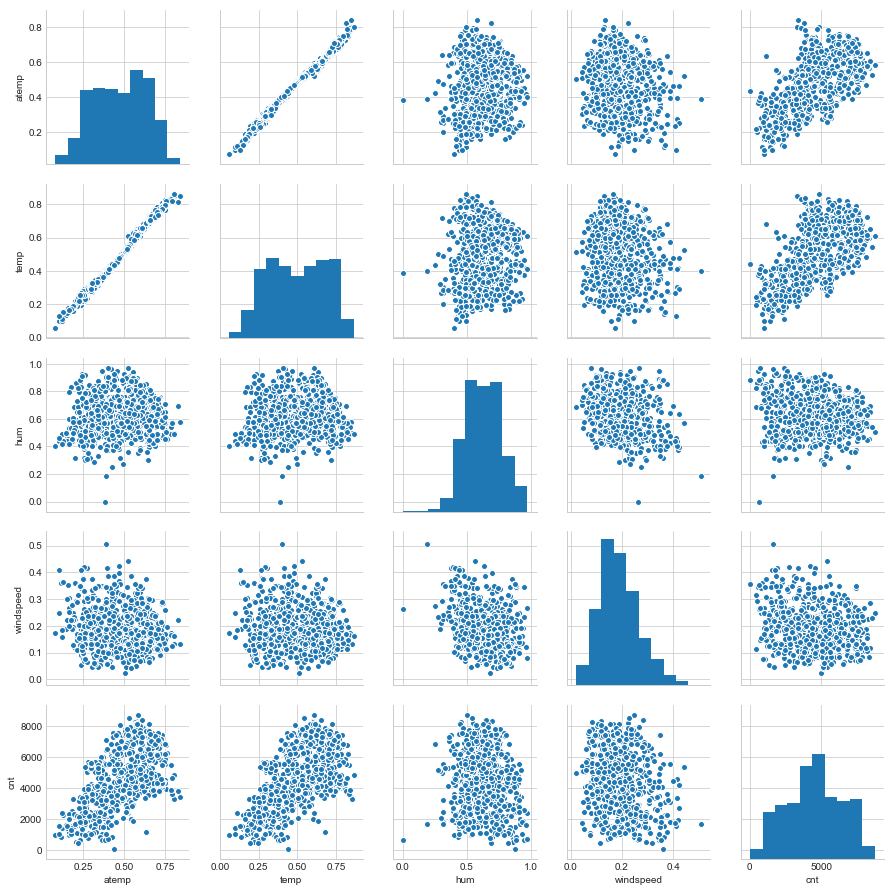

In [18]:
# 外れ値が消えたか散布図を確認
plt.figure(figsize=(18, 6))
sns.pairplot(corr_f)

hum(湿度)に外れ値が残っているため、これも除外する

In [19]:
#湿度の外れ値を抽出(0.25以下をTrue表示)
hum_out = day_df['hum']  < 0.25
pd.set_option("display.max_rows", 731)
print(hum_out)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49      True
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68      True
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [20]:
#49番目/68番目をdrop
day_df = day_df.drop(68)
day_df = day_df.drop(49)

In [21]:
# 外れ値除外後の気温関連の変数を再度格納
corr_f = day_df[['atemp','temp','hum','windspeed','cnt']]

<Figure size 1296x432 with 0 Axes>

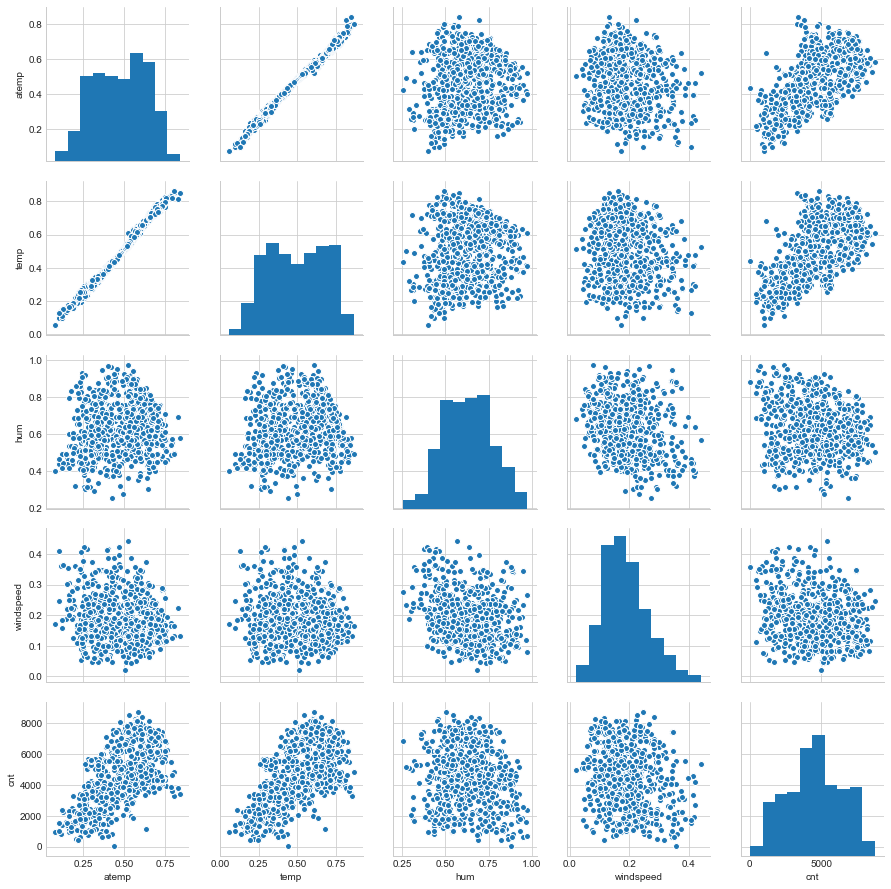

In [22]:
#外れ値が消えたか確認
plt.figure(figsize=(18, 6))
sns.pairplot(corr_f)

In [23]:
# 外れ値除外後の相関係数の算出
corr = corr_f.select_dtypes(include = ['float64', 'int64']).corr()
corr['cnt'].sort_values(ascending = False)

cnt          1.000000
atemp        0.635840
temp         0.626909
hum         -0.121424
windspeed   -0.228757
Name: cnt, dtype: float64

続いて、天候の影響も確認していく。

# ４．天候について分析

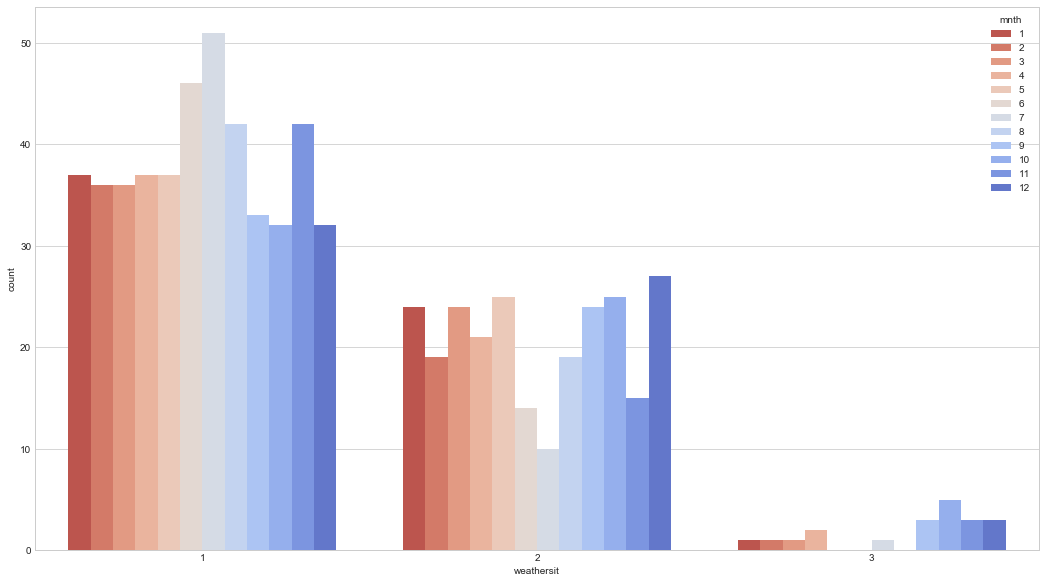

In [24]:
# 2年分の月別の各天候の度数
plt.figure(figsize=(18, 10))
sns.countplot(x='weathersit', hue = 'mnth' ,data = day_df, palette='coolwarm_r')

Weathersit 1:晴れ、2:曇り、3:雨  
mnth 1月～12月  
そもそも雨の日が少ないため、今回の結果には影響を持ちにくい。

In [25]:
# 天候ごとの平均値を確認
day_df.groupby('weathersit').mean()

,instant,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
weathersit,,,,,,,,,,,,,,
1,368.744035,2.501085,0.511931,6.468547,0.032538,2.941432,0.663774,0.511326,0.489341,0.566402,0.189475,963.841649,3915.049892,4878.891540
2,363.765182,2.453441,0.497976,6.493927,0.024291,3.064777,0.716599,0.470366,0.452868,0.725887,0.186431,687.352227,3348.510121,4035.862348
3,349.550000,3.050000,0.300000,8.350000,0.000000,3.150000,0.750000,0.435658,0.414434,0.891316,0.242409,192.450000,1669.850000,1862.300000


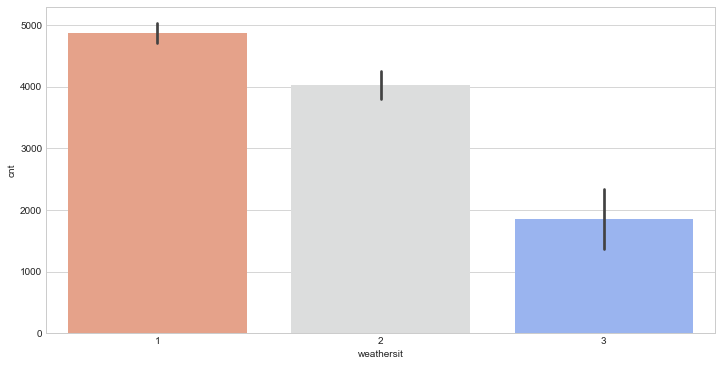

In [26]:
# 天候ごとのレンタル台数の平均値
plt.figure(figsize=(12, 6))
sns.barplot('weathersit', 'cnt' ,data = day_df,palette = 'coolwarm_r')

天気が悪くなるにつれて、レンタル台数も減少傾向。  
その中でも大きな割合を占めているのはライトユーザー。  
雨が降るとライトユーザーを中心に利用しなくなる傾向が見て取れる。  

雨になると、気温は下がり、湿度は上がり、風は強くなる。  
つまり、気温関連の相関は雨の傾向を示している可能性があるが  
度数が少ないため、一旦考慮せずに分析を進める。

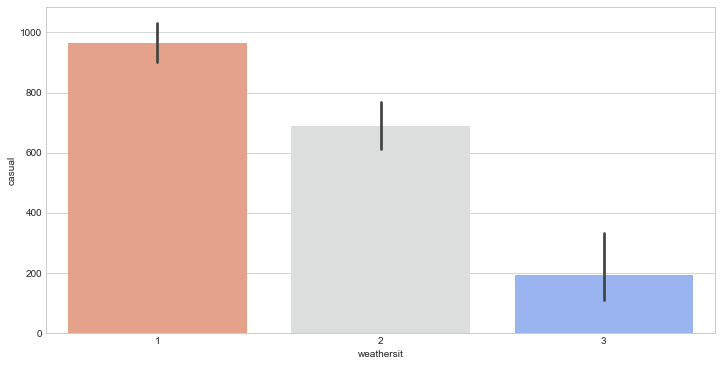

In [27]:
# 天候ごとのライトユーザーの平均値
plt.figure(figsize=(12, 6))
sns.barplot('weathersit', 'casual' ,data = day_df,palette = 'coolwarm_r')

# ５．2011年と2012年の比較

2011年,2012年の２年分のデータがあるため、念のため分割して平均値を確認する。

In [28]:
# 2011年、2012年それぞれの平均値を確認
day_df.groupby('yr').mean()

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
yr,,,,,,,,,,,,,,
0,183.680441,2.506887,6.548209,0.027548,2.997245,0.685950,1.418733,0.487175,0.467267,0.646693,0.190338,679.542700,2738.763085,3418.305785
1,548.372603,2.493151,6.509589,0.030137,2.980822,0.682192,1.369863,0.503480,0.482508,0.612280,0.189458,1017.210959,4578.482192,5595.693151


2011年と2012年で気候に大きな変化があった可能性を考慮して算出した。  
利用者数に差は見られるが、説明変数には大きな違いが見られない。  
よって、サービスの展開が進んだことによるものとして今回は着目しない。

# ６．月ごとの分析

In [29]:
# 月ごとの平均値を確認
day_df.groupby('mnth').mean()

,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,,,,,,,,,,,,,,
1,198.500000,1.000000,0.500000,0.048387,2.870968,0.645161,1.419355,0.236444,0.239796,0.585828,0.206303,194.225806,1982.112903,2176.338710
2,234.696429,1.000000,0.517857,0.035714,2.946429,0.696429,1.375000,0.297442,0.298094,0.574242,0.210474,257.696429,2415.821429,2673.517857
3,261.098361,1.360656,0.508197,0.000000,3.081967,0.721311,1.426230,0.390562,0.381893,0.598122,0.222057,727.836066,3014.737705,3742.573770
4,288.500000,2.000000,0.500000,0.033333,3.000000,0.666667,1.416667,0.469999,0.457081,0.588063,0.234482,1013.366667,3471.533333,4484.900000
5,319.000000,2.000000,0.500000,0.032258,2.903226,0.693548,1.403226,0.594798,0.565662,0.688958,0.182989,1214.274194,4135.500000,5349.774194
6,349.500000,2.333333,0.500000,0.000000,3.100000,0.716667,1.233333,0.684097,0.638246,0.575806,0.185420,1231.766667,4540.600000,5772.366667
7,380.000000,3.000000,0.500000,0.032258,2.935484,0.661290,1.193548,0.755470,0.704094,0.597876,0.166059,1260.596774,4303.080645,5563.677419
8,407.983607,3.000000,0.491803,0.000000,2.967213,0.737705,1.311475,0.708340,0.658181,0.638827,0.171960,1156.655738,4483.442623,5640.098361
9,441.500000,3.266667,0.500000,0.033333,3.050000,0.666667,1.500000,0.616485,0.579299,0.714714,0.165945,1172.050000,4594.466667,5766.516667


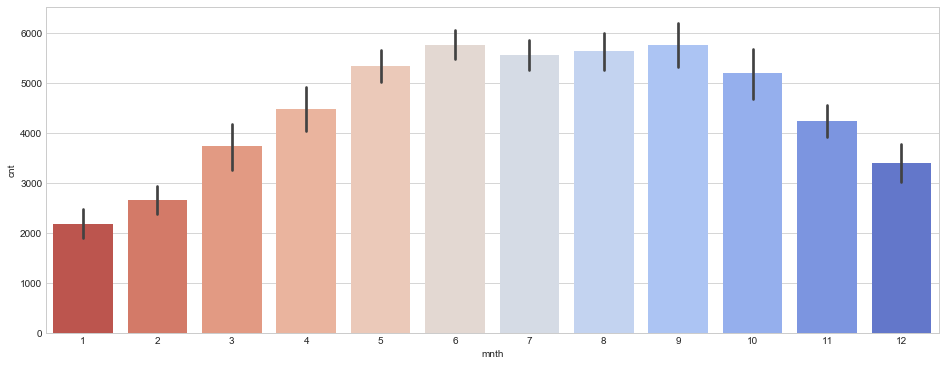

In [30]:
# 利用者数を月別にグラフ化
plt.figure(figsize=(16, 6))
sns.barplot('mnth', 'cnt' ,data = day_df,palette = 'coolwarm_r')

1月～4月にかけて利用者が増加していき、5月～9月の期間が利用者数がピークをむかえる。  
10月以降は減少していき、12月、1月は利用者が少ない。  

気温と大きな相関があるようにもとらえられるが  
アメリカでは学生の夏休みが5月中旬から9月中旬まで。  
学生の利用が季節ごとの利用者数に影響しているのではないか？  
たまたま、暖かい時期に学生の夏休みが重なっている可能性も。  

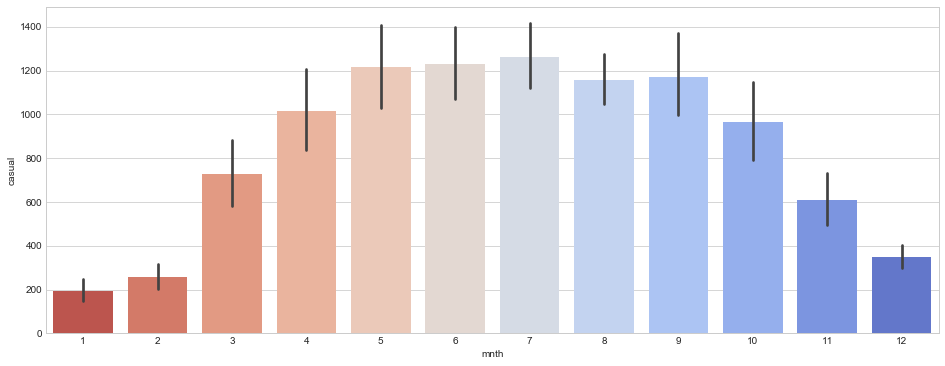

In [31]:
# ライトユーザー数を月別にグラフ化
plt.figure(figsize=(16, 6))
sns.barplot('mnth', 'casual' ,data = day_df,palette = 'coolwarm_r')

1月、2月、12月が極端に減少。  
ライトユーザーは低気温の影響を特に受けやすい傾向にある。  
この時期にライトユーザー層をターゲットに、キャンペーンを打つと効果的かもしれない。

# ７．曜日/休日について分析

In [32]:
# 曜日ごとの平均値を確認
day_df.groupby('weekday').mean()

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,
0,366.000000,2.485714,0.504762,6.476190,0.000000,0.000000,1.304762,0.483628,0.465288,0.627659,0.188530,1338.295238,2890.533333,4228.828571
1,367.000000,2.495238,0.504762,6.495238,0.142857,0.857143,1.390476,0.493449,0.474563,0.637577,0.190691,674.133333,3663.990476,4338.123810
2,364.500000,2.519231,0.500000,6.480769,0.009615,0.990385,1.442308,0.504282,0.483337,0.641829,0.191825,556.182692,3954.480769,4510.663462
3,365.500000,2.500000,0.500000,6.509615,0.009615,0.990385,1.451923,0.504626,0.481610,0.645368,0.187736,551.144231,3997.394231,4548.538462
4,369.388350,2.524272,0.504854,6.582524,0.019417,0.980583,1.368932,0.505460,0.483642,0.615416,0.190921,596.252427,4110.271845,4706.524272
5,365.291262,2.485437,0.495146,6.563107,0.019417,0.980583,1.398058,0.493378,0.473332,0.614172,0.185952,745.194175,3921.233010,4666.427184
6,368.028846,2.490385,0.500000,6.596154,0.000000,0.000000,1.403846,0.482835,0.462751,0.623711,0.193598,1474.230769,3104.346154,4578.576923


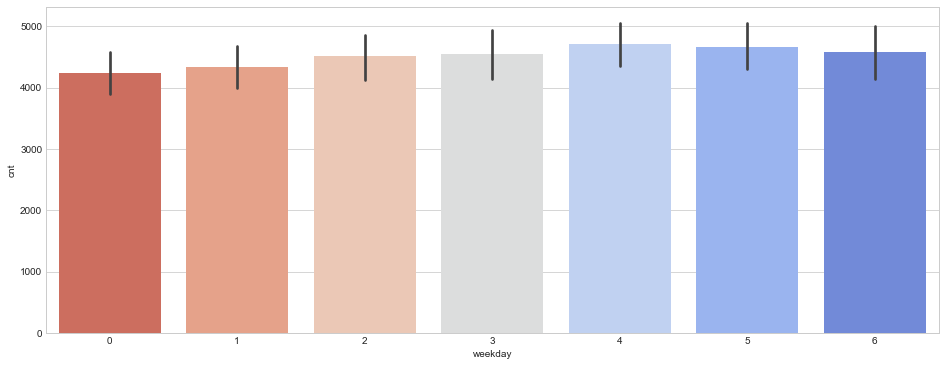

In [33]:
# 曜日ごとのレンタル台数の平均値
plt.figure(figsize=(16, 6))
sns.barplot('weekday', 'cnt' ,data = day_df,palette = 'coolwarm_r')

曜日順に0～6までの数字が割り振られている。  
0：日曜日  
1：月曜日  
2：火曜日  
3：水曜日  
4：木曜日  
5：金曜日  
6：土曜日  

曜日間でレンタル台数全体(cnt)に大きな差はない。   

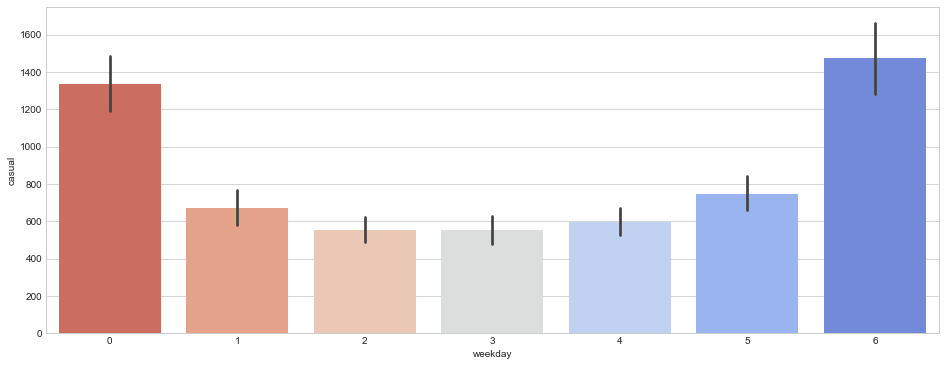

In [34]:
# 曜日ごとのライトユーザーの平均値
plt.figure(figsize=(16, 6))
sns.barplot('weekday', 'casual' ,data = day_df,palette = 'coolwarm_r')

ライトユーザーだけで集計すると、休日での利用数は２倍程度変わってくる。  
ここから、平日と休日で用途が違う可能性が考えられる。  
例えば、平日は通勤/通学での利用ユーザー。休日は買い物やサイクリングとして利用しているユーザーなど。

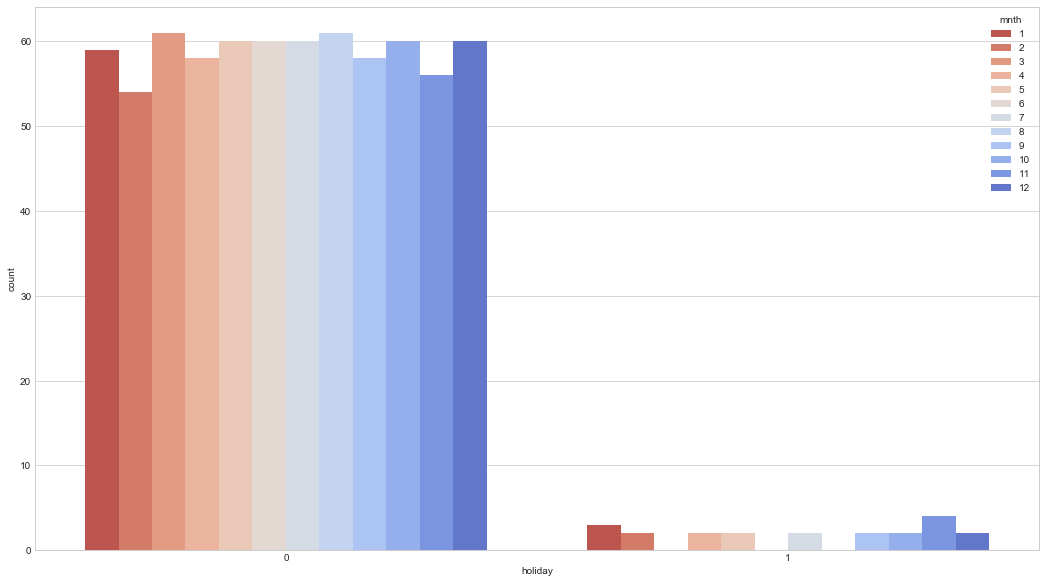

In [35]:
# 月別の祝祭日(holiday)の頻度
plt.figure(figsize=(18, 10))
sns.countplot(x='holiday', hue = 'mnth' ,data = day_df, palette='coolwarm_r')

祝日はまばらに分布しているものの、度数が少ないため、いったん考慮しない。

# ８．重回帰分析による要因分析と予測モデル作成

ここまでで、分かったことは  
１．季節ごとに利用者数に差がみられる  
２．利用者数と気温は高い相関を持つ  
３．利用者数と風速、湿度は弱い負の相関をもつ。  
４．雨だと利用者数が晴れ/曇りの半数以下に下がる  

上記から、seasons(季節)/atemp(体感気温)/temp(気温)/windspeed(風速)/hum(湿度)/weathersit(天候)を変数として重回帰分析を行うが  
多重共線性を考慮して、seasons/atemp/tempの3変数に関しては、cntと最も相関の高いatempのみを変数として採用する。

In [36]:
# ダミー変数への置き換え
weathersit_dummies = pd.get_dummies(day_df['weathersit'])

In [37]:
# ダミー変数の名前を変更
weathersit_dummies.columns = ['Clear','Cloudy','LightRain']

In [38]:
# ダミー変数のDataFrameを作成。
dummies = pd.concat([weathersit_dummies],axis=1)

In [39]:
# day_dfから不要になった列と、目的変数「cnt」を削除。
X = day_df.drop(['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','casual','registered','cnt'],axis=1)

In [40]:
# dummiesを結合させた説明変数XのDataFrameを作成。
X = pd.concat([X,dummies],axis=1)
X.head()

,atemp,hum,windspeed,Clear,Cloudy,LightRain
0,0.363625,0.805833,0.160446,0,1,0
1,0.353739,0.696087,0.248539,0,1,0
2,0.189405,0.437273,0.248309,1,0,0
3,0.212122,0.590435,0.160296,1,0,0
4,0.229270,0.436957,0.186900,1,0,0


In [41]:
# 重回帰分析の準備
import sklearn
from sklearn.linear_model import LinearRegression,Lasso

In [42]:
#予測モデルの作成
target = day_df[['cnt']]
lreg = LinearRegression()
lreg.fit(X, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# 偏回帰係数のデータフレームを作成。
coeff_df = DataFrame([X.columns, lreg.coef_[0]]).T
coeff_df

,0,1
0,atemp,7357.31
1,hum,-2435.07
2,windspeed,-3626.72
3,Clear,559.895
4,Cloudy,362.524
5,LightRain,-922.419


In [44]:
# 決定係数の算出
lreg.score(X,target)

0.486904697578216

In [45]:
#切片
print(lreg.intercept_)

[2785.167163]


# ９．予測精度の確認

学習(train)と検証(test)データを分割し、予測精度の検証を実施。

In [66]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [47]:
# trainとtestにデータを分割
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,target)

In [48]:
# trainデータを使って予測モデルを作成。
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# trainとtestのどちらも使って予測結果を出力
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [50]:
# X_trainでの平均二乗誤差
np.mean((Y_train - pred_train) ** 2)

cnt    1.984449e+06
dtype: float64

In [51]:
# Y_testでの平均二乗誤差
np.mean((Y_test - pred_test) ** 2)

cnt    1.709666e+06
dtype: float64

trainとtestで大きな差は見られない。

In [52]:
np.sum((Y_test - pred_test) ** 2)

cnt    3.111591e+08
dtype: float64

Text(0.5,1,'Residual Plots')

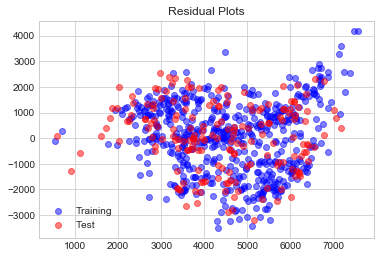

In [53]:
# 学習用データ残差プロット
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用データの残差プロット
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

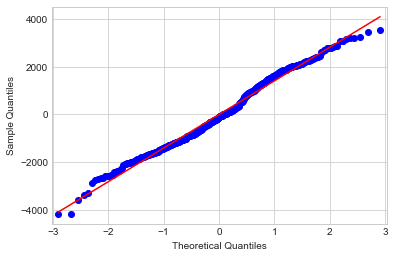

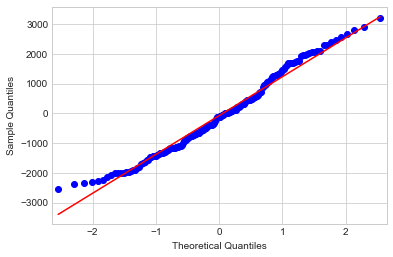

In [54]:
#QQプロット
mse_train = (Y_train - pred_train) 
mse_test = (Y_test - pred_test) 
fig = sm.qqplot(mse_train["cnt"],line="s")
fig = sm.qqplot(mse_test["cnt"],line="s")

# 10.ランダムフォレストによる要因分析と予測モデル作成

In [55]:
#必要なライブラリをインポート
from sklearn.ensemble import RandomForestRegressor

In [56]:
# モデル作成
rfr = RandomForestRegressor(100)

In [57]:
# 予測モデル学習
rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
# trainとtestのどちらも使って予測結果を出力
pred_train_r = rfr.predict(X_train)
pred_test_r = rfr.predict(X_test)

In [59]:
#重要度の算出
feature_names = X.columns
importances = rfr.feature_importances_
print("{0:<20}".format ("feature names"), "importances")

for (feature_name, importance) in zip(feature_names, importances):
    print("{0:<20}".format (feature_name), importance)

feature names        importances
atemp                0.6458536578428525
hum                  0.20410862128506185
windspeed            0.13366815483572392
Clear                0.00710138623347192
Cloudy               0.007140252816087716
LightRain            0.0021279269868021626


In [60]:
#ランダムフォレストの２乗誤差
np.sum((Y_test["cnt"] - pred_test_r) ** 2)

341400099.145

# 11.Lasso回帰による要因分析と予測モデル作成

分析精度の比較のため、Lasso回帰による偏回帰係数と平均二乗誤差を算出する。

In [61]:
#Lasso回帰
lasso = Lasso()
lasso.fit(X, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
lasso.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
# trainとtestのどちらも使って予測結果を出力
pred_train_l = lasso.predict(X_train)
pred_test_l = lasso.predict(X_test)

In [64]:
#偏回帰係数のデータフレームを作成。
coeff_df = DataFrame([X.columns, lasso.coef_]).T
coeff_df

,0,1
0,atemp,7130.07
1,hum,-1842.92
2,windspeed,-3043.29
3,Clear,319.693
4,Cloudy,-0
5,LightRain,-1018.65


In [65]:
#Lasso回帰の平均二乗誤差
np.sum((Y_test["cnt"] - pred_test_l) ** 2)

313279574.0884841

重回帰分析とさほど変わらず、ランダムフォレストは最も値が高いため、  
予測モデルとしては、重回帰分析の結果を採用する。

# 12.傾向分析の結果と仮説

自転車のレンタル台数の平均値から読み取れたこと  
・季節ごとに利用者数に差がみられる  
・利用者数と気温は高い相関を持つ  
・利用者数と風速、湿度は弱い負の相関をもつ  
・雨だと利用者数が晴れ/曇りの半数以下に下がる  

上記より、自転車のレンタル台数には気温が大きく影響しているのではという仮説をもとに  
気温と関連する変数を含む、atemp(体感気温)、windspeed(風速)、hum(湿度),weathersit(天候)の4変数による  
要因分析と予測モデル作成を行った。

# 13.要因分析の結果

わかりやすい指標であるため、ランダムフォレストによる重要度より読み取る  

atemp                0.64  
hum                  0.20  
windspeed            0.13  
Clear                0.007  
Cloudy               0.007  
LightRain            0.002  

体感気温が影響度としては最も高く、次いで湿度、風速の順に影響を及ぼしていることが分かった。

# 14.予測モデル作成

平均二乗誤差の値から、重回帰分析による予測モデルを採用  

決定係数(寄与率)は48%  

重回帰分析による予測モデル  
偏回帰係数  
atemp:7357.31  
hum:-2435.07  
windspeed:-3626.72  
Clear:559.895  
Cloudy:362.524  
LightRain:-922.419  
切片:2785.167163